In [4]:
!pip install hvplot --user

  Using cached hvplot-0.11.1-py3-none-any.whl.metadata (15 kB)
  Using cached bokeh-3.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached colorcet-3.1.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached holoviews-1.19.1-py3-none-any.whl.metadata (9.8 kB)
  Using cached panel-1.5.3-py3-none-any.whl.metadata (15 kB)
  Using cached param-2.1.1-py3-none-any.whl.metadata (7.2 kB)
  Using cached pyviz_comms-3.0.3-py3-none-any.whl.metadata (7.7 kB)
  Using cached linkify_it_py-2.0.3-py3-none-any.whl.metadata (8.5 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdit_py_plugins-0.4.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached uc_micro_py-1.0.3-py3-none-any.whl.metadata (2.0 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached hvplot-0.11.1-py3-none-any.whl (161 kB)
Using cached bokeh-3.6.0-py3-none


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

# CHECKOUT THE DATA

In [8]:
df = pd.read_csv("Real estate.csv")

In [9]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
# Returns the number of rows against the number of columns in a dataset
df.shape

(414, 8)

In [12]:
# Provides a brief info about the datasets in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [13]:
# Calculates the correlation matrix for numerical columns of a dataset.
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

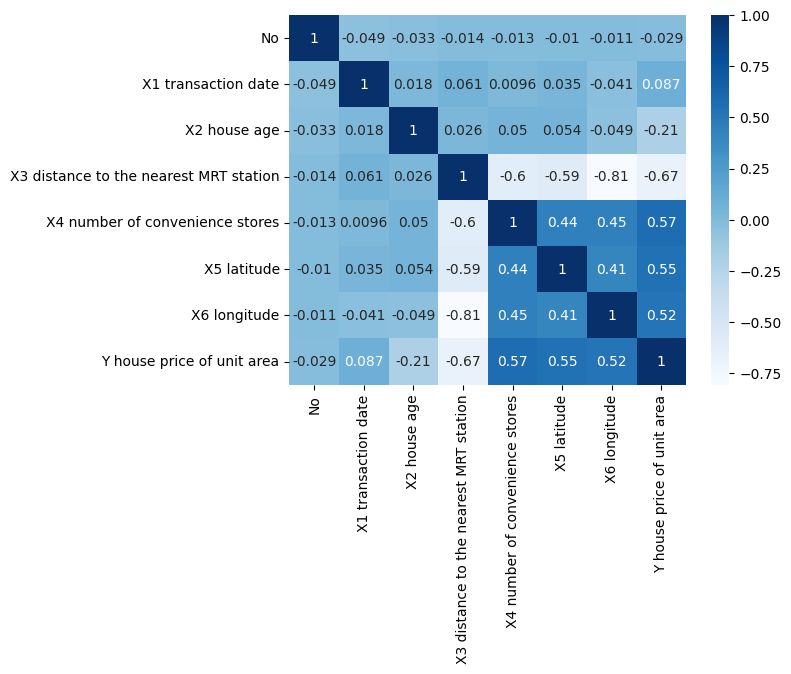

In [17]:
sns.heatmap(df.corr(), annot=True,cmap='Blues')

# EXPLORATORY DATA ANALYSIS [EDA]

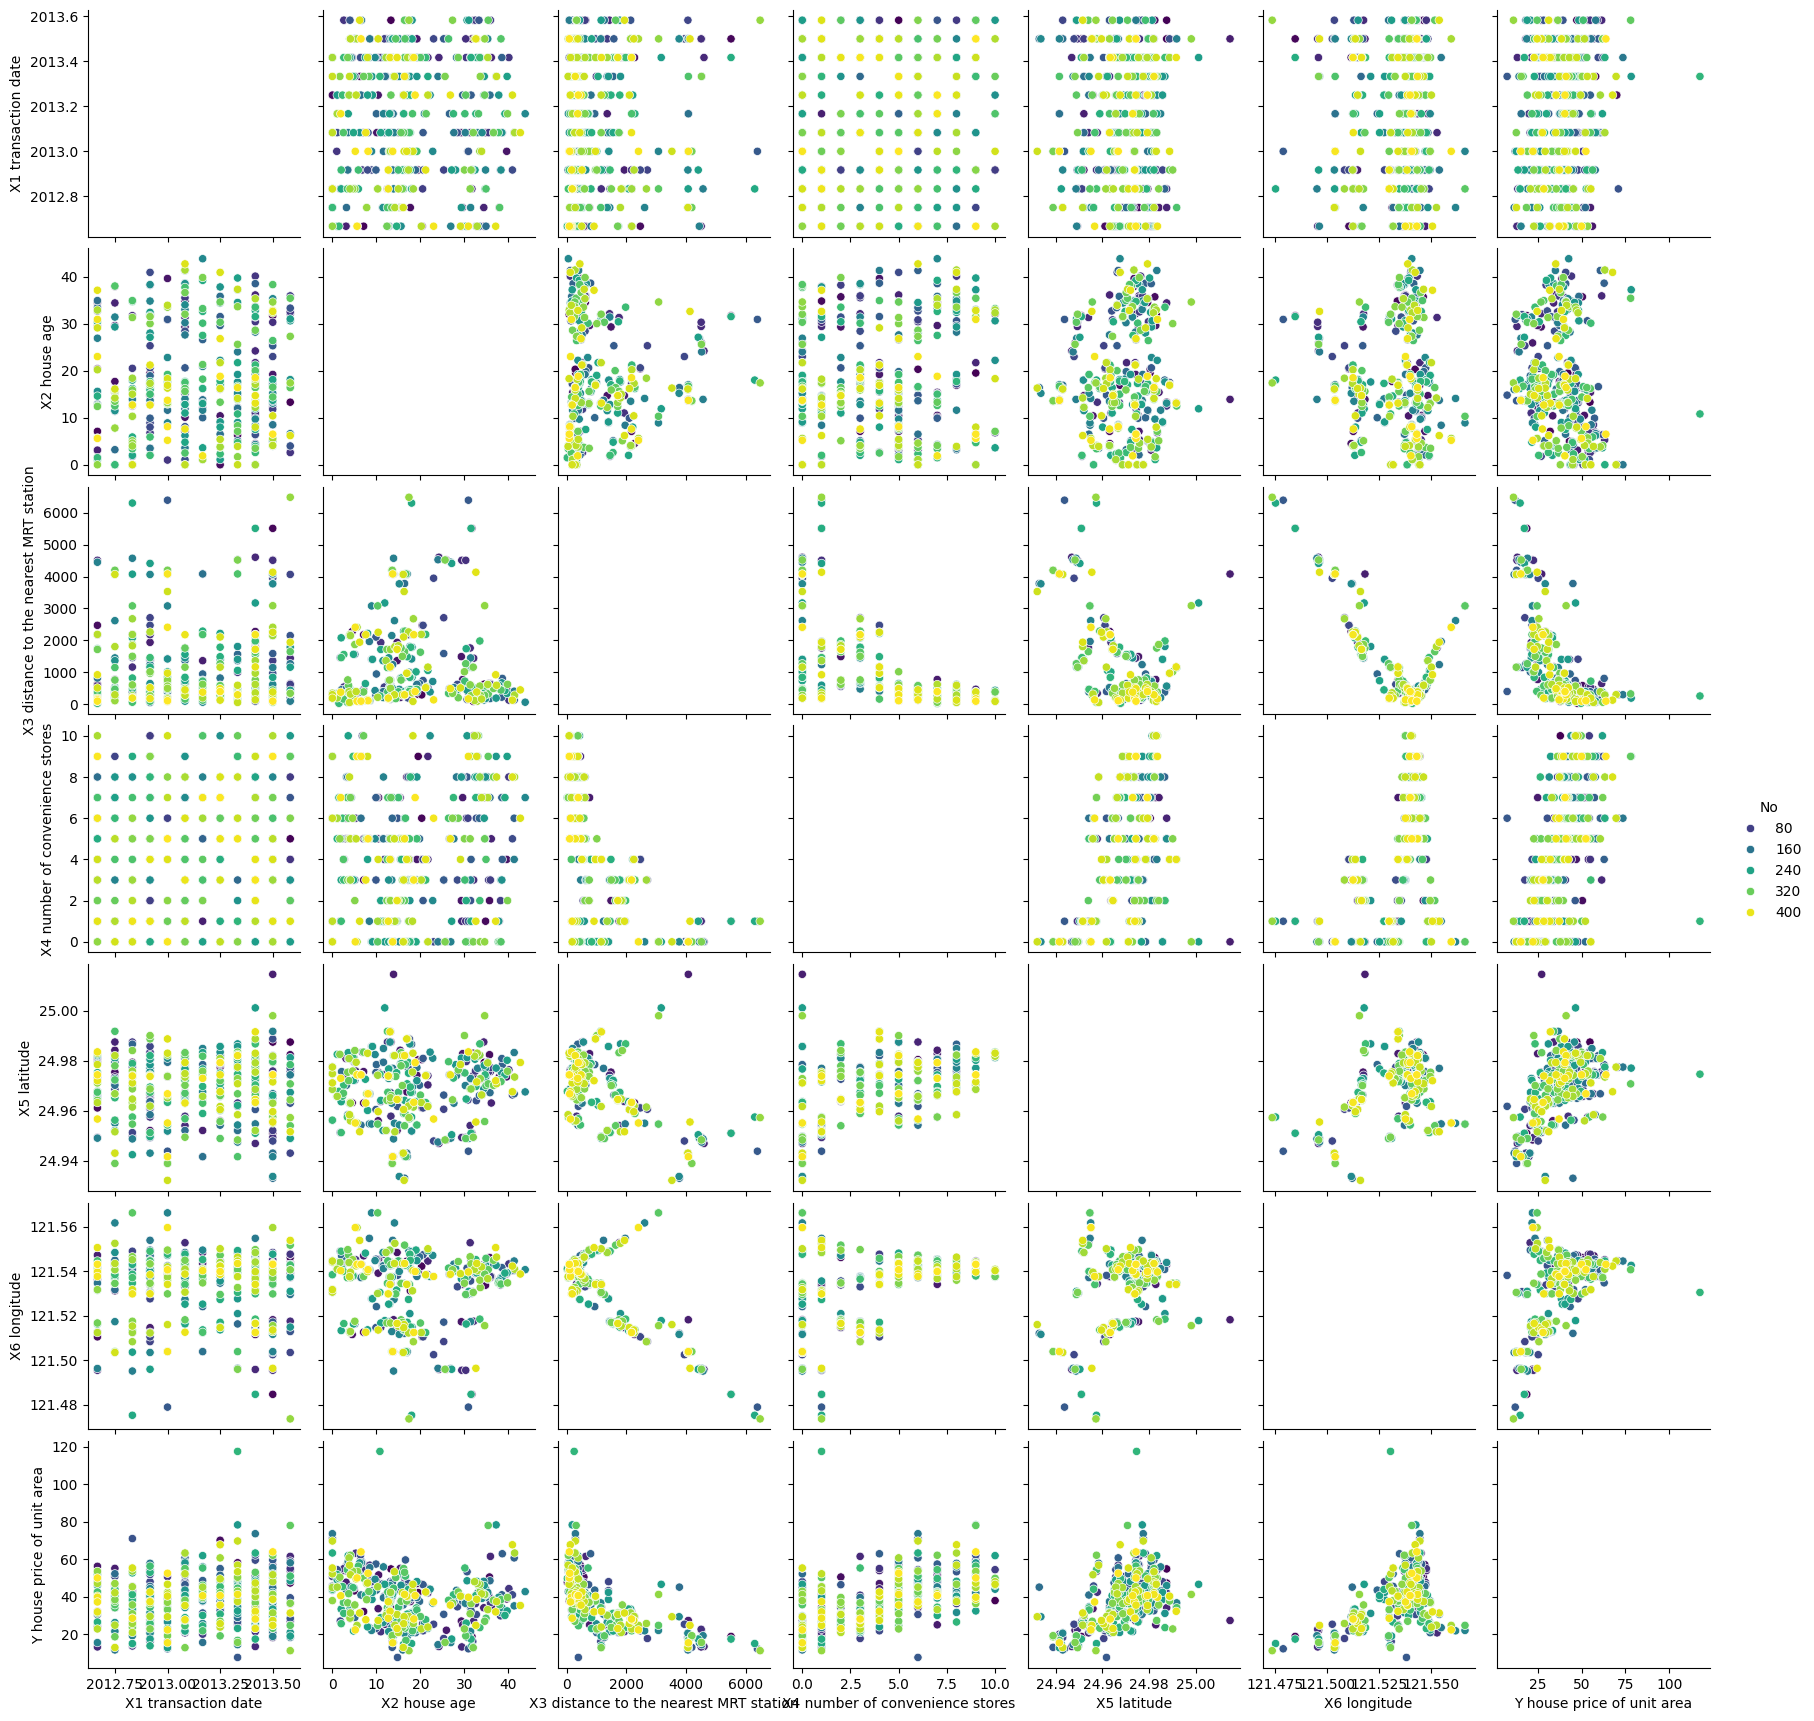

In [22]:
# Creates a grid of scatter plot
sns.pairplot(df, hue="No", palette="viridis")

In [21]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# TRAINING A LINEAR REGRESSION MODEL
## x and y arrays

In [23]:
X=df.drop('Y house price of unit area', axis=1)

y=df['X4 number of convenience stores']

In [24]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 7) 
y= (414,)


# TRAIN TEST SPLIT
## Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
X_train.shape

(289, 7)

In [27]:
X_test.shape

(125, 7)

# LINEAR REGRESSION

In [28]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

# MODEL EVALUATION

In [32]:
# Finds the model coefficients of the trained datasets.
model.coef_

array([-1.39348725e-17, -2.02789174e-15, -9.13982431e-17,  5.20417043e-18,
        1.00000000e+00,  1.52203411e-14,  9.10019016e-15])

In [33]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficients'])

,Coeficients
No,-1.393487e-17
X1 transaction date,-2.027892e-15
X2 house age,-9.139824e-17
X3 distance to the nearest MRT station,5.204170e-18
X4 number of convenience stores,1.000000e+00
X5 latitude,1.522034e-14
X6 longitude,9.100190e-15


# PREDICTIONS FROM OUR MODEL

In [37]:
y_pred = model.predict(X_test)

# ✔️ Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
  
  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

  $$
  \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  $$

📌 **Comparing these metrics:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [38]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [39]:
MAE

6.3276395024868955e-15

In [40]:
MSE

7.21858649613611e-29

In [41]:
RMSE

8.496226513068086e-15

In [42]:
df["X4 number of convenience stores"].mean()

4.094202898550725

# RESIDUAL HISTOGRAM
- Often for Linear Regression it is a good idea to separately evaluate residuals
$$(y−y^)$$
and not just calculate performance metrics (e.g. RMSE).

- Let's explore why this is important...

- The residual eerors should be random and close to a normal distribution.

In [43]:
test_residual = y_test - y_pred

In [44]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

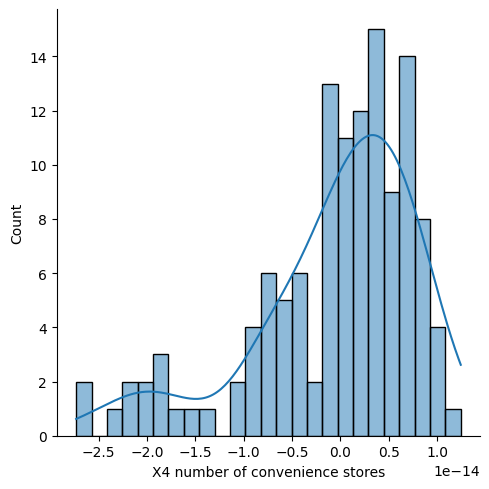

In [45]:
sns.displot(test_residual, bins=25, kde=True)

- Residual plot shows residual error VS. true y value.

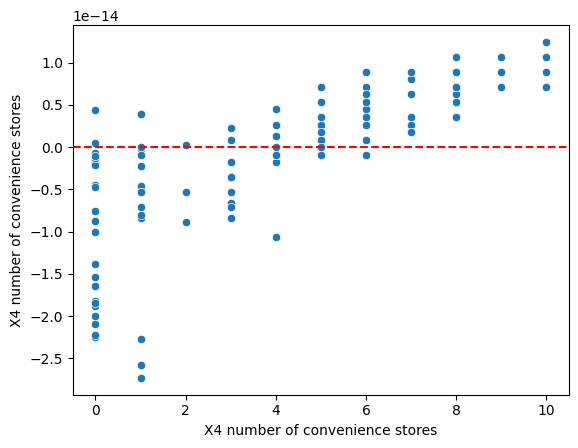

In [46]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

 * **Residualplot showing a clear pattern, indicating Linear Regression no valid!**
